## Challenge: If a tree falls in the forest 

Random forests are basically a collection of decision trees. But how do the accuracies of the two models compare?

- Pick a dataset. Build the best decision tree you can.

- Now try to match that with the simplest random forest you can. How do the accuracies of the two models compare?

- Measure simplicity with runtime. Compare the runtime of the decision tree and the Random Forest.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time as t
import sklearn.ensemble
%matplotlib inline 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
mushroom = pd.read_csv('mushrooms.csv')

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushroom.isnull().sum()  # no null values yay!

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
mushroom.shape  # 23 variables, 8124 rows

(8124, 23)

In [7]:
#for col in mushroom.columns:
#    mush_col = mushroom[col].unique().tolist()
##
#for col in mushroom_enc.columns:
#    mush_enc_col = mushroom_enc[col].unique().tolist()
#
#lst = zip(mush_col, mush_enc_col)
#for values in lst.v: 
#    print(values)

In [8]:
# This dataset has all values in string, we are going to convert them to numeric. 

from sklearn.preprocessing import LabelEncoder  # LE is an utility class to help normalize labels such that they contain only values between 0 and n_classes-1. 
labelencoder = LabelEncoder()

mush_enc = pd.DataFrame()
#le_name_mapping = {}
for col in mushroom.columns:
    #labelencoder.fit_transform(mushroom[col])
    # use fit_transform if you are not interested in inversse transform -- use fit and transform separately instead
    # see: https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn
    
    mush_enc[col] = labelencoder.fit_transform(mushroom[col])
#    labelencoder.transform(mushroom[col])
    le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))  # to get the mapping of the values
    print(col, le_name_mapping)
    
# note "?" in stalk-root

class {'e': 0, 'p': 1}
cap-shape {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
cap-surface {'f': 0, 'g': 1, 's': 2, 'y': 3}
cap-color {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
bruises {'f': 0, 't': 1}
odor {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-attachment {'a': 0, 'f': 1}
gill-spacing {'c': 0, 'w': 1}
gill-size {'b': 0, 'n': 1}
gill-color {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
stalk-shape {'e': 0, 't': 1}
stalk-root {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
stalk-surface-above-ring {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-surface-below-ring {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-color-above-ring {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
stalk-color-below-ring {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
veil-type {'p': 0}
veil-color {'n': 0, 'o': 1, 'w': 2, 'y': 3}
ring-number {'n': 0, 'o': 1

In [9]:
# Actual dataset with string values

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
# Dataset with numerical values 

mush_enc.head()


# .dummies is better because the LE implies relatioship between the values of one categorical variables. 
# if the values had relationship (5, 10, 15) then label encoding would make sense. 

# Run the model dummies 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
print(mushroom.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [12]:
# Creating subsets on the basis of mushroom characteristics 

mush_cap = mush_enc[['cap-shape', 'cap-surface', 'cap-color']]
mush_gill = mush_enc[['gill-attachment', 'gill-spacing', 'gill-size', 'gill-color']]
mush_stalk = mush_enc[['stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring']]
mush_veil = mush_enc[['veil-type', 'veil-color']]
mush_demo = mush_enc[['bruises', 'odor','population', 'habitat']]

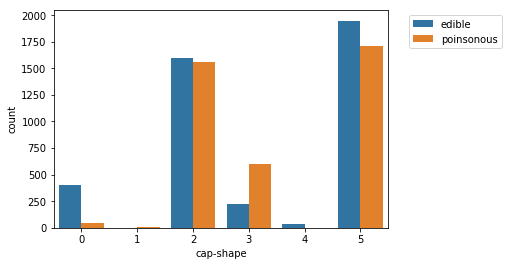

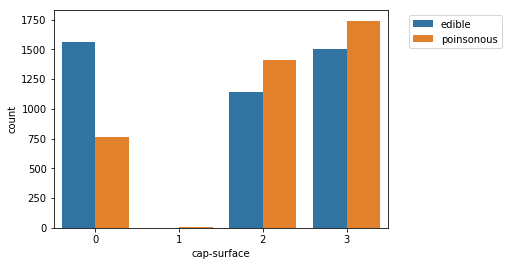

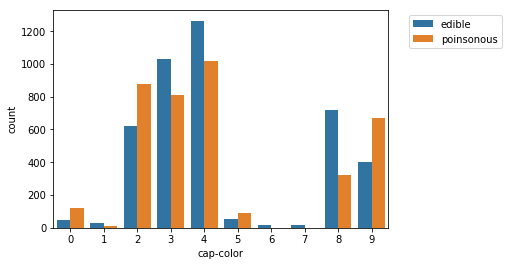

In [13]:
# Visualizing edible and poisonouns mushrooms wrt cap properties

for col in mush_cap.columns:

    sns.countplot(x= col,hue=mush_enc['class'], data=mush_cap)
    plt.xlabel
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()




#f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
## Plot a simple histogram with binsize determined automatically
#sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
#
## Plot a kernel density estimate and rug plot
#sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
#
## Plot a filled kernel density estimate
#sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
#
## Plot a historgram and kernel density estimate
#sns.distplot(d, color="m", ax=axes[1, 1])
#
#plt.setp(axes, yticks=[])
#plt.tight_layout()
#



### if cap-shape is 0 then there is a chance that 90% of them are edible. So this is a good feature for using the model.

# create dummies for cap shape and use the vlaue corredsponding to 0 - decision treee will automatically find this, but for others you need this. 



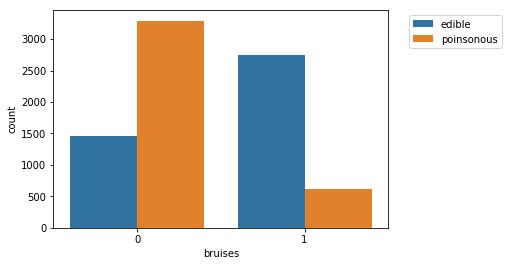

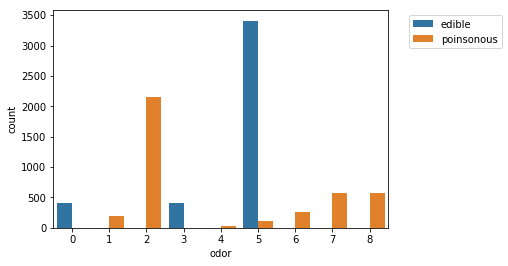

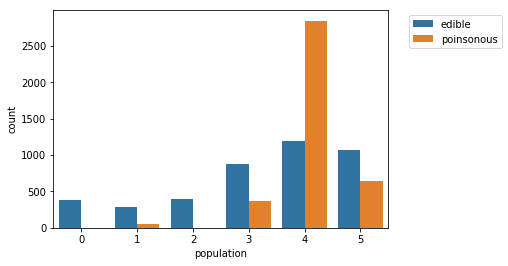

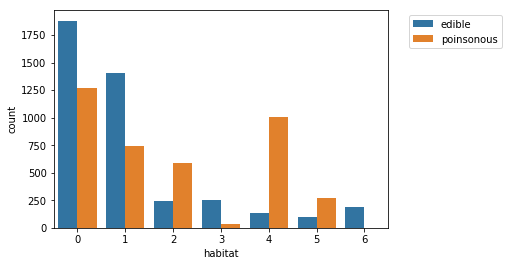

In [14]:
# Visualizing edible and poisonouns mushrooms wrt demographic properties

for col in mush_demo.columns:

    sns.countplot(x= col,hue=mush_enc['class'], data=mush_demo)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

    
# if there's no bar it doesn't mean we don't have data. 5

# ffeatyre odor is a good doistinguishing features - 5: edible, 8: poisonous. 

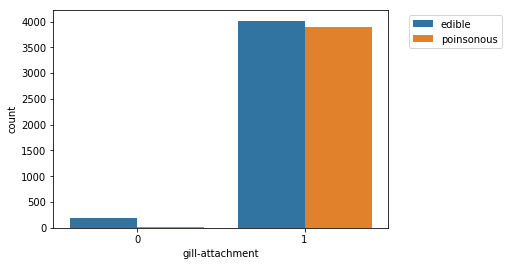

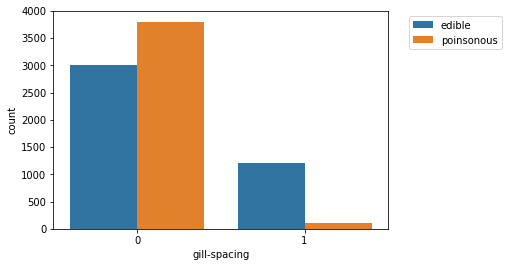

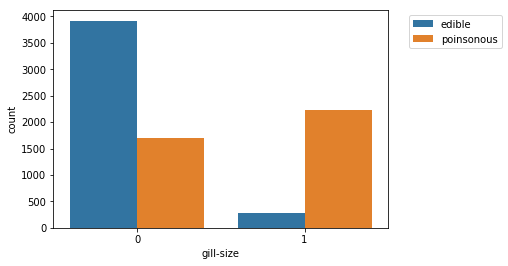

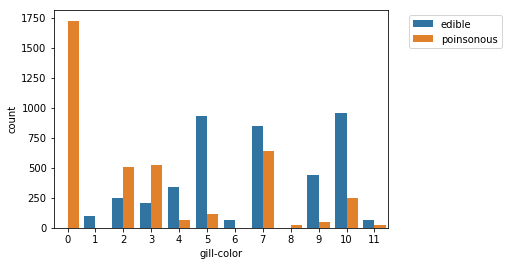

In [15]:
# Visualizing edible and poisonouns mushrooms wrt gill properties

for col in mush_gill.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_gill)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()


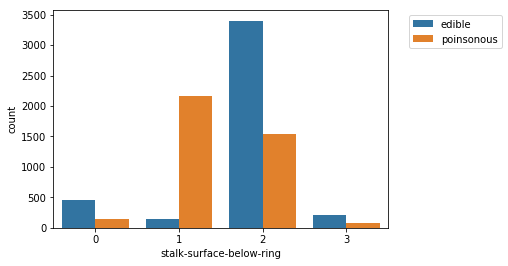

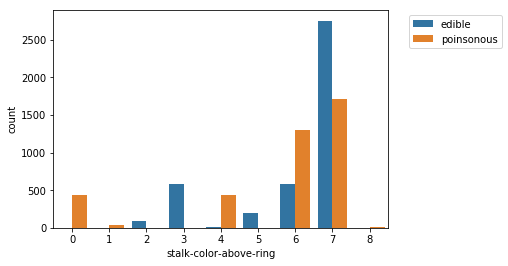

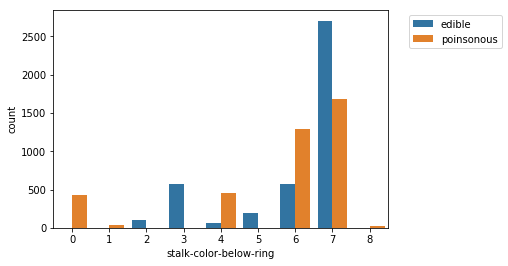

In [16]:
# Visualizing edible and poisonouns mushrooms wrt stack properties

for col in mush_stalk.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_stalk)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()

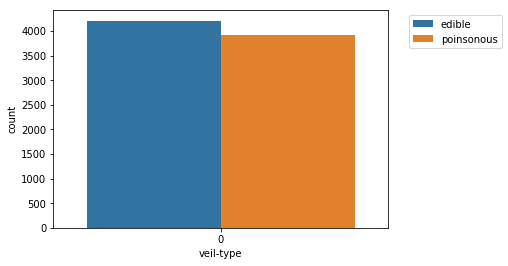

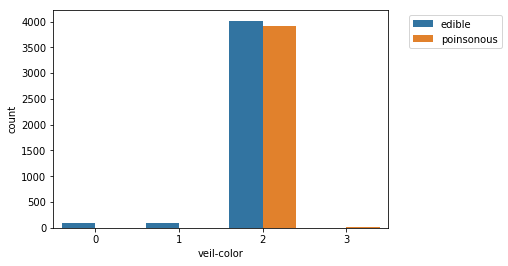

In [17]:
# Visualizing edible and poisonouns mushrooms wrt veil properties

for col in mush_veil.columns:
    sns.countplot(x= col,hue=mush_enc['class'], data=mush_veil)
    plt.legend(['edible', 'poinsonous'], loc=9, bbox_to_anchor=(1.2, 1))
    plt.show()
    
    


Not quite sure if the visualizations are providing any information here. 
Let's move on to the models 

### Decision Tree Classifier and Random Forest 

In [18]:
# First get the X and the y out 

X = mush_enc.drop('class', axis=1)
y = mush_enc['class']

print(X.shape, y.shape)

(8124, 22) (8124,)


In [19]:
# Training and test datasets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

print(X_train.shape, y_train.shape, X_test.shape, y_train.shape)

(5686, 22) (5686,) (2438, 22) (5686,)


In [29]:
# Decision Tree classifier -- Default 

from sklearn import tree
from sklearn.model_selection import cross_val_score
decTree = tree.DecisionTreeClassifier()

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())




Accuracy score:  1.0
Confusion Matrix:  [[1246    0]
 [   0 1192]]
Crossvalidated accuracy  1.0


In [ ]:
# possiblity of overfitiing = drop cd to CV=3. 

#simple decision tree - depth - 

In [42]:
# Decision Tree classifier -- Default 

from sklearn import tree
from sklearn.model_selection import cross_val_score
decTree = tree.DecisionTreeClassifier(max_depth=2)  # simple with max depth 2

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())



Accuracy score:  0.911402789171452
Confusion Matrix:  [[1207   39]
 [ 177 1015]]
Crossvalidated accuracy  0.9106635076081006


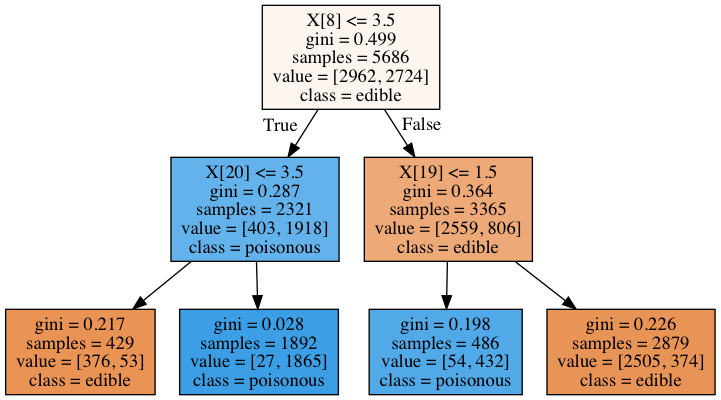

In [43]:
# Render tree 
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# because of the encoding error the decision tree is not correct. 
# be careful with label encoding in future 

In [48]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
decTree = tree.DecisionTreeClassifier(max_depth=1)  # simple with max depth 1 -- simples t

decTree.fit(X_train, y_train)

tree_pred = decTree.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())



Accuracy score:  0.7969647251845775
Confusion Matrix:  [[1101  145]
 [ 350  842]]
Crossvalidated accuracy  0.7873784232543535


In [47]:
#from sklearn import tree
#from sklearn.model_selection import cross_val_score
#decTree = tree.DecisionTreeClassifier(max_depth=0)  # simple with max depth 2
#
#decTree.fit(X_train, y_train)
#
#tree_pred = decTree.predict(X_test)
#
#from sklearn.metrics import confusion_matrix, accuracy_score
#print('Accuracy score: ', accuracy_score(y_test, tree_pred))
#print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))
#
#print('Crossvalidated accuracy ', cross_val_score(decTree, X_train, y_train, cv=10).mean())
#
#

ValueError: max_depth must be greater than zero. 

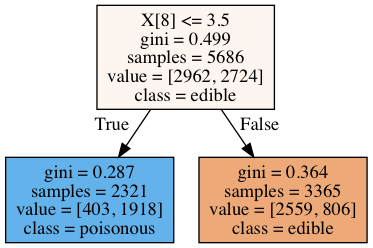

In [49]:
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())



## smplest DT

# simplest rf - 1 DT with max depth 1

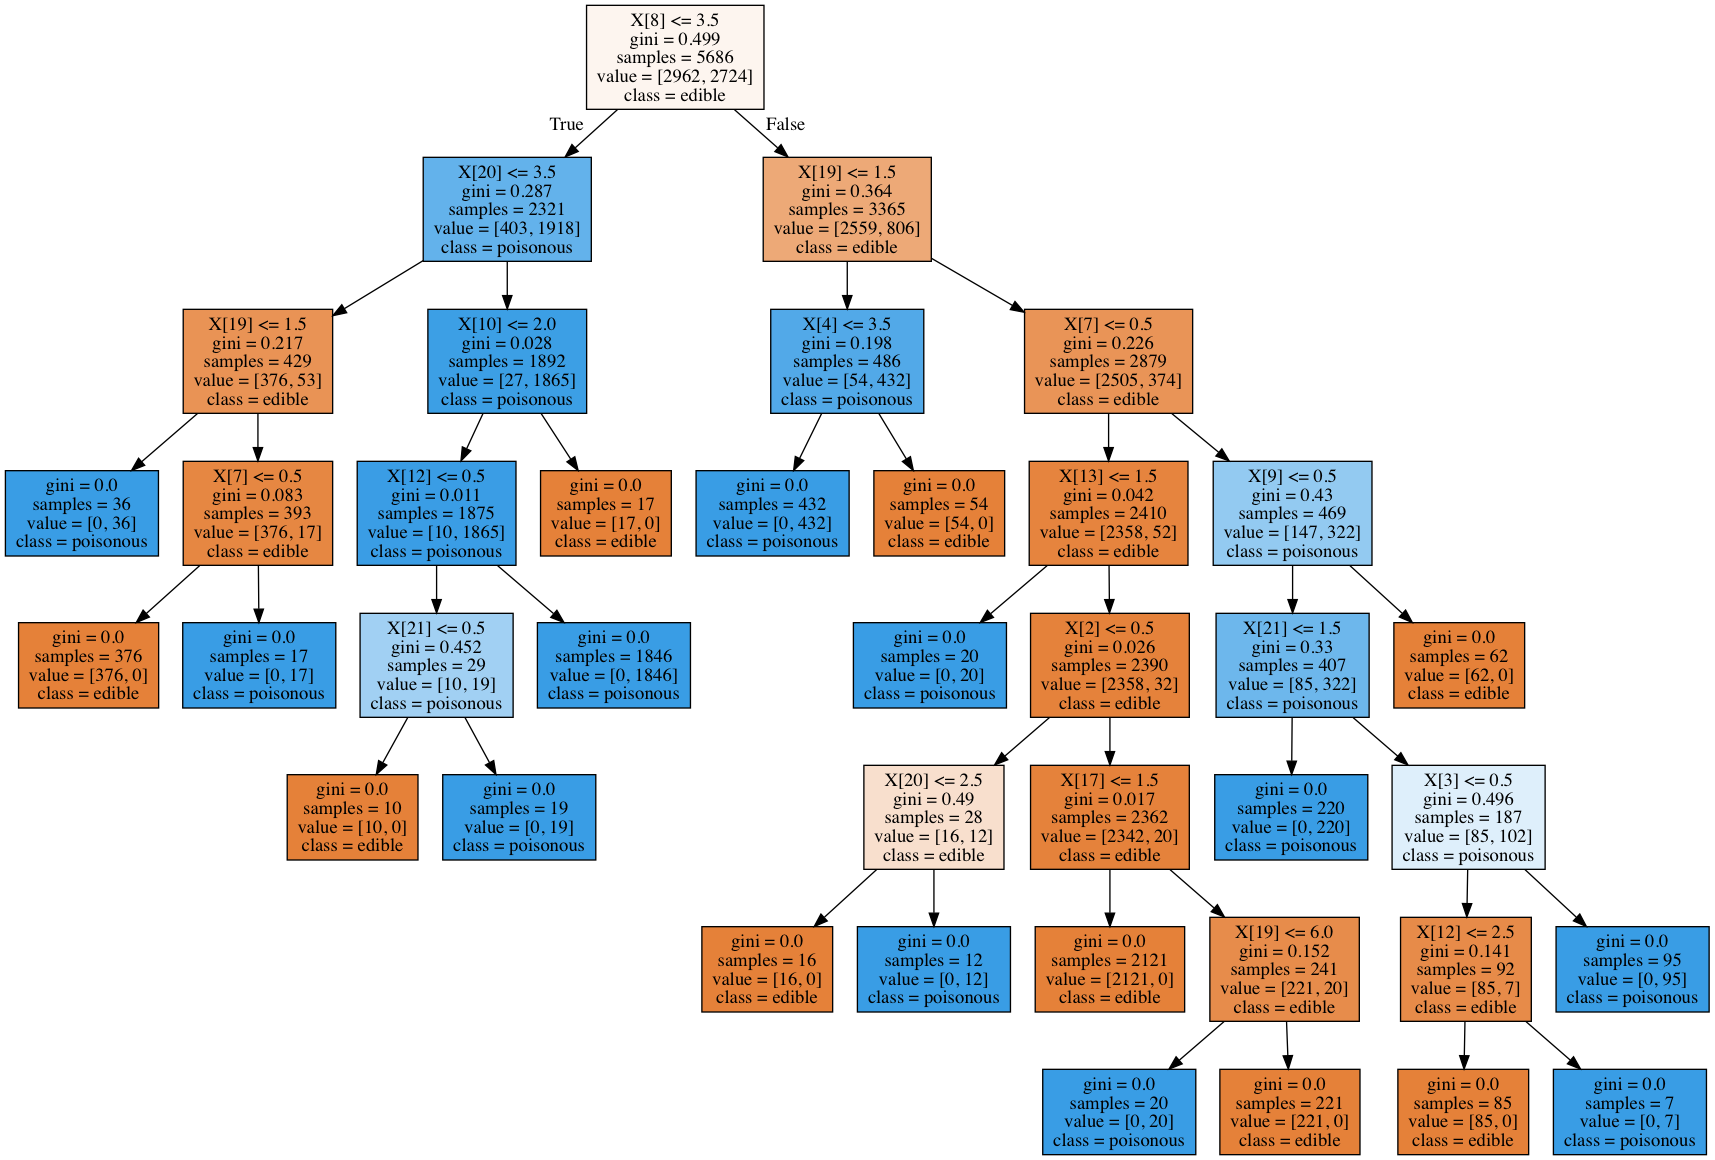

In [30]:
import graphviz
import pydotplus
from IPython.display import Image

# Render tree 
dot_data = tree.export_graphviz(decTree, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [31]:
# With a custom decision tree - tuning parameters - criterion entropy, max_feature = sqrt of n_ftr, 
# max_depth gives better accuracy with 5,


decTree1 = tree.DecisionTreeClassifier(criterion='entropy', max_features='sqrt', 
                                      max_depth=5, random_state=1)

decTree1.fit(X_train, y_train)
tree_pred = decTree1.predict(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, tree_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, tree_pred))

print('Crossvalidated accuracy: ', cross_val_score(decTree1, X_train, y_train, cv=10).mean())

Accuracy score:  0.9885151763740772
Confusion Matrix:  [[1246    0]
 [  28 1164]]
Crossvalidated accuracy:  0.9894486738207433


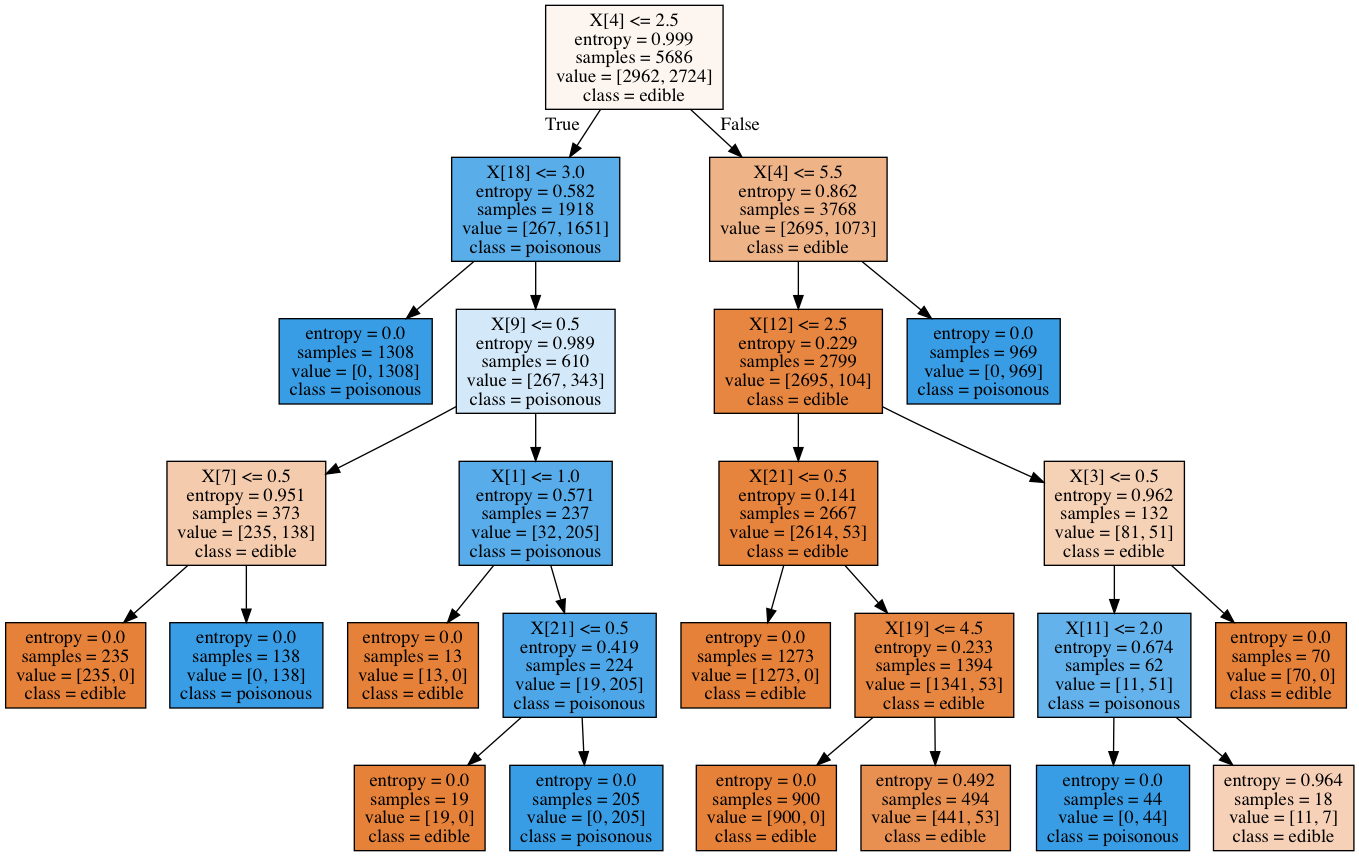

In [44]:
# Render tree 
dot_data = tree.export_graphviz(decTree1, out_file=None, #feature_names=X_train.co, 
                                class_names = ['edible', 'poisonous'],
                                filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

for lower accuracy -- 
- DT is probably not the best model for this 
- try other models
- but also see if other models have better accuracy 

- enough data? - take subsets - 2000-=> accuracy, increase 3000> accuracy --- does adding more data increase accuracy? 
- Feature engineering 
- Type of classifier you are using. Try other classifiers - also set respective different parameters . 

In [33]:
# Trying Random Forest - default RF

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest, X_train, y_train, cv=10).mean())


Accuracy score:  1.0
Confusion Matrix:  [[1246    0]
 [   0 1192]]
Crossvalidated accuracy:  1.0


In [34]:
# Trying Random Forest - tuning parameters - imitating tuned parameters in the decision tree model

from sklearn.ensemble import RandomForestClassifier

forest1 = RandomForestClassifier(n_estimators=5, criterion='entropy', 
                                 max_features='sqrt')

forest1.fit(X_train, y_train)
y_pred = forest1.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest1, X_train, y_train, cv=10).mean())


Accuracy score:  1.0
Confusion Matrix:  [[1246    0]
 [   0 1192]]
Crossvalidated accuracy:  1.0


In [35]:
## Trying this hyperparameter tuning from Kaggle

model_RF=RandomForestClassifier()

tuned_parameters = {'min_samples_leaf': range(10,100,10), 'n_estimators' : range(10,100,10),
                    'max_features':['auto','sqrt','log2']
                    }
    

In [36]:
# Applying gridSearch 

from sklearn.grid_search import RandomizedSearchCV

RF_model= RandomizedSearchCV(model_RF, tuned_parameters,cv=10,scoring='accuracy',n_iter=20,n_jobs= -1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
RF_model.fit(X_train, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'min_samples_leaf': range(10, 100, 10), 'n_estimators': range(10, 100, 10), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='accuracy', verbose=0)

In [45]:
pd.DataFrame(RF_model.grid_scores_)  # a way to see which parameters are better /value 

,parameters,mean_validation_score,cv_validation_scores
0,"{'n_estimators': 50, 'min_samples_leaf': 90, '...",0.979775,"[0.9842105263157894, 0.9859649122807017, 0.978..."
1,"{'n_estimators': 80, 'min_samples_leaf': 60, '...",0.981182,"[0.9736842105263158, 0.9842105263157894, 0.980..."
2,"{'n_estimators': 70, 'min_samples_leaf': 30, '...",0.992262,"[0.9982456140350877, 0.9929824561403509, 0.980..."
3,"{'n_estimators': 90, 'min_samples_leaf': 70, '...",0.980830,"[0.9824561403508771, 0.9842105263157894, 0.968..."
4,"{'n_estimators': 90, 'min_samples_leaf': 40, '...",0.985403,"[0.9894736842105263, 0.987719298245614, 0.9806..."
5,"{'n_estimators': 90, 'min_samples_leaf': 70, '...",0.978544,"[0.9719298245614035, 0.9771929824561404, 0.971..."
6,"{'n_estimators': 70, 'min_samples_leaf': 60, '...",0.982941,"[0.980701754385965, 0.987719298245614, 0.97891..."
7,"{'n_estimators': 20, 'min_samples_leaf': 60, '...",0.980830,"[0.9754385964912281, 0.9771929824561404, 0.970..."
8,"{'n_estimators': 20, 'min_samples_leaf': 70, '...",0.978368,"[0.9894736842105263, 0.980701754385965, 0.9824..."
9,"{'n_estimators': 40, 'min_samples_leaf': 90, '...",0.977489,"[0.968421052631579, 0.9754385964912281, 0.9683..."


In [39]:
print(RF_model.best_score_)

0.9996482588814632


In [40]:
print(RF_model.best_params_)

{'n_estimators': 60, 'min_samples_leaf': 10, 'max_features': 'log2'}


In [41]:
y_pred_model = RF_model.predict(X_test)
print('Accuracy: ', RF_model.score(X_test, y_pred_model))
print('Confustion Matrix: ', confusion_matrix(y_test, y_pred_model))
print('AUC-ROC: ', sklearn.metrics.classification_report(y_test, y_pred_model))
print('AUC-ROC score: ', sklearn.metrics.roc_auc_score(y_test, y_pred_model))

Accuracy:  1.0
Confustion Matrix:  [[1246    0]
 [   0 1192]]
AUC-ROC:               precision    recall  f1-score   support

          0       1.00      1.00      1.00      1246
          1       1.00      1.00      1.00      1192

avg / total       1.00      1.00      1.00      2438

AUC-ROC score:  1.0


In [50]:
# Trying Random Forest - default RF

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=1, n_estimators=1)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)


print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

print('Crossvalidated accuracy: ', cross_val_score(forest, X_train, y_train, cv=10).mean())


Accuracy score:  0.6927809680065627
Confusion Matrix:  [[1214   32]
 [ 717  475]]
Crossvalidated accuracy:  0.7518539976019902


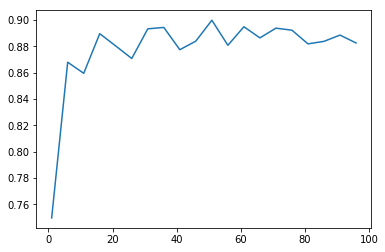

In [60]:
# Trying Random Forest - default RF

score = []
final_time = []
for n in np.arange(1, 100, 5):
    
    start_time = t.time()
    from sklearn.ensemble import RandomForestClassifier
    
    forest = RandomForestClassifier(max_depth=1, n_estimators=n)
    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    
    #print('Accuracy score: ', accuracy_score(y_test, y_pred))
    #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    
    score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
    end_time = t.time() -start_time
    
    final_time.append(end_time)
plt.plot(np.arange(1, 100, 5), score)


# even with more estimators accuracy not increase
    

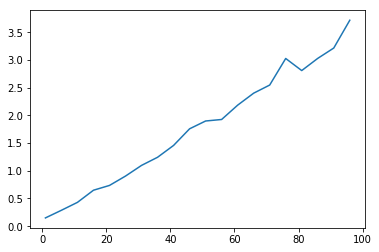

In [61]:
plt.plot(np.arange(1, 100, 5), final_time)

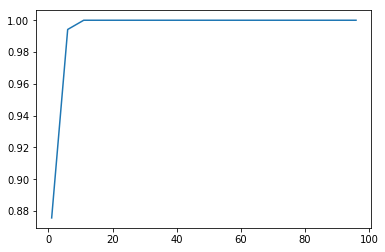

In [62]:
score = []
final_time = []
for n in np.arange(1, 100, 5):
    
    start_time = t.time()
    from sklearn.ensemble import RandomForestClassifier
    
    forest = RandomForestClassifier(max_depth=n, n_estimators=20)
    
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    
    #print('Accuracy score: ', accuracy_score(y_test, y_pred))
    #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
    
    score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
    end_time = t.time() -start_time
    
    final_time.append(end_time)
plt.plot(np.arange(1, 100, 5), score)


# even with more estimators accuracy not increase
    # depth vs. accuracty 

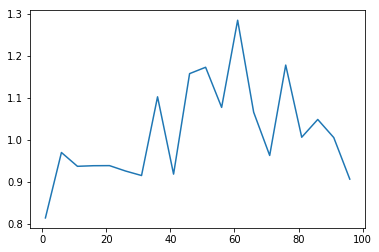

In [63]:
plt.plot(np.arange(1, 100, 5), final_time)

In [ ]:
## why - if it saturates in accuracy then the n-depths - doesn't have to go to that depth 
# also, due to the randomness it's bouncing around with different ndepths so everytime 



# we optimized it sepaarately npw try to optimize them together. 

# measure of complexity -- wrt time,  # of trees times depth. 

## two for loops for n-est and max-depth. -- bruth force approach 

# plot the complexity vs. accuracy -- somth similar to the time vs. accu

## cpmel = #n-time * depth 
# and plot that 

In [ ]:
plt.plot(np.arange(1, 100, 5), final_time)

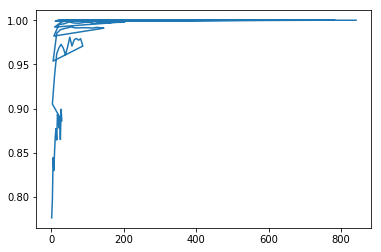

In [64]:
score = []
final_time = []
complexity = []
params = []

for d in np.arange(1, 30, 2):
    for n in np.arange(1, 30, 2):
        
        start_time = t.time()
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
    
        
        #print('Accuracy score: ', accuracy_score(y_test, y_pred))
        #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d*n)
        end_time = t.time() -start_time
        
        final_time.append(end_time)
        
        
plt.plot(complexity, score)



    

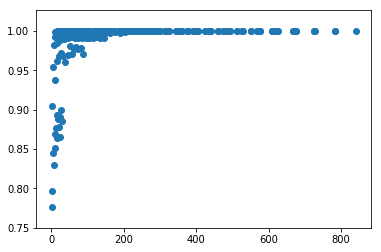

In [65]:
plt.scatter(complexity, score)

In [ ]:
# saved the d and n, 

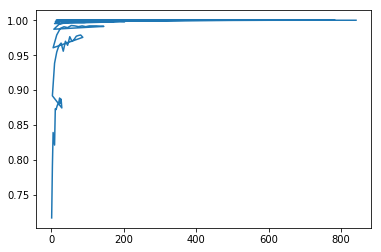

In [66]:
score = []
final_time = []
complexity = []
params = []

for d in np.arange(1, 30, 2):
    for n in np.arange(1, 30, 2):
        
        start_time = t.time()
        from sklearn.ensemble import RandomForestClassifier
        
        forest = RandomForestClassifier(max_depth=d, n_estimators=n)
        
        forest.fit(X_train, y_train)
        sta_pred_me = t.time()
        y_pred = forest.predict(X_test)
        end.pred_time = t.time() - sta_pred_me
        
        #print('Accuracy score: ', accuracy_score(y_test, y_pred))
        #print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))
        
        score.append(cross_val_score(forest, X_train, y_train, cv=10).mean())
        complexity.append(d*n)
        params.append({'depth': d, 'n_est': n})
        end_time = t.time() -start_time
        
        final_time.append(end_time)
        
        
plt.plot(complexity, score)

In [72]:
df_params = pd.DataFrame(params)

In [75]:
df_params['score'] = score
df_params['complexity'] = complexity 
df_params['time'] = final_time

In [79]:
df_params.sort_values(by=[ 'time', 'score'])  # if time is the factor then choose 

,depth,n_est,score,complexity,time
120,17,1,0.999649,17,0.100579
105,15,1,0.999472,15,0.102302
150,21,1,0.999824,21,0.105297
165,23,1,0.999120,23,0.105863
195,27,1,1.000000,27,0.107197
90,13,1,0.999824,13,0.108399
60,9,1,0.995256,9,0.109377
180,25,1,0.999825,25,0.109778
45,7,1,0.987164,7,0.110281
210,29,1,0.999824,29,0.110635


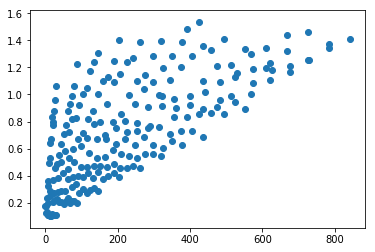

In [77]:
plt.scatter(complexity, final_time)

In [ ]:
# n_est should weigh more.

com = depth * n_est**2

com = depth + n_est**2


# you want the comple linear 

In [ ]:
## this is exactly the d\grdsea